# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key



In [99]:
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [100]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [101]:
api_key = weather_api_key


In [102]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print("City not found. Skipping...")
    except Exception as e:
        print(f"An error occurred: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san antonio de pale
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | la asuncion
Processing Record 4 of Set 1 | aswan
Processing Record 5 of Set 1 | makinsk
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | sovetskiy
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | barra de santo antonio
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | hadibu
Processing Record 19 of Set 1 | hewitt
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | ballina
Processing Record 22 of Set 1 | iqaluit
Process

Processing Record 37 of Set 4 | pangody
Processing Record 38 of Set 4 | kirensk
Processing Record 39 of Set 4 | igarka
Processing Record 40 of Set 4 | santiago de cao
Processing Record 41 of Set 4 | ta'izz
Processing Record 42 of Set 4 | shahba
Processing Record 43 of Set 4 | qulsary
Processing Record 44 of Set 4 | susuman
Processing Record 45 of Set 4 | holualoa
Processing Record 46 of Set 4 | tahe
Processing Record 47 of Set 4 | bodaybo
Processing Record 48 of Set 4 | welshpool
Processing Record 49 of Set 4 | kendari
Processing Record 0 of Set 5 | chonchi
Processing Record 1 of Set 5 | ylitornio
Processing Record 2 of Set 5 | adh dhibiyah
City not found. Skipping...
Processing Record 3 of Set 5 | vila velha
Processing Record 4 of Set 5 | mathis
Processing Record 5 of Set 5 | ain sukhna
Processing Record 6 of Set 5 | yangor
City not found. Skipping...
Processing Record 7 of Set 5 | prainha
Processing Record 8 of Set 5 | flin flon
Processing Record 9 of Set 5 | mahabe
City not found. S

Processing Record 28 of Set 8 | ashland
Processing Record 29 of Set 8 | yuzhno-kurilsk
Processing Record 30 of Set 8 | punxsutawney
Processing Record 31 of Set 8 | qaisumah
Processing Record 32 of Set 8 | laojunmiao
Processing Record 33 of Set 8 | urubamba
Processing Record 34 of Set 8 | san luis
Processing Record 35 of Set 8 | djibouti
Processing Record 36 of Set 8 | grand-bassam
Processing Record 37 of Set 8 | la union
Processing Record 38 of Set 8 | beloyarskiy
Processing Record 39 of Set 8 | belozersk
Processing Record 40 of Set 8 | puerto armuelles
Processing Record 41 of Set 8 | nishinoomote
Processing Record 42 of Set 8 | shaydon
Processing Record 43 of Set 8 | mont-dore
Processing Record 44 of Set 8 | vista hermosa de negrete
Processing Record 45 of Set 8 | view park-windsor hills
Processing Record 46 of Set 8 | cidreira
Processing Record 47 of Set 8 | troitsko-pechorsk
Processing Record 48 of Set 8 | douz
Processing Record 49 of Set 8 | port isabel
Processing Record 0 of Set 9

Processing Record 16 of Set 12 | cuamba
Processing Record 17 of Set 12 | payande
City not found. Skipping...
Processing Record 18 of Set 12 | labrador city
Processing Record 19 of Set 12 | zabol
Processing Record 20 of Set 12 | island harbour
Processing Record 21 of Set 12 | mahina
Processing Record 22 of Set 12 | rufino
Processing Record 23 of Set 12 | mirny
Processing Record 24 of Set 12 | pisco
Processing Record 25 of Set 12 | wangqing
Processing Record 26 of Set 12 | posto fiscal rolim de moura
Processing Record 27 of Set 12 | ho
City not found. Skipping...
Processing Record 28 of Set 12 | oban
Processing Record 29 of Set 12 | hailar
Processing Record 30 of Set 12 | greve
Processing Record 31 of Set 12 | marechal candido rondon
Processing Record 32 of Set 12 | inhambane
Processing Record 33 of Set 12 | boiling springs
-----------------------------
Data Retrieval Complete      
-----------------------------


In [103]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [104]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,299.95,80,100,4.15,GQ,1701479575
1,albany,42.6001,-73.9662,279.94,88,100,0.89,US,1701479324
2,la asuncion,11.0333,-63.8628,300.02,85,6,7.79,VE,1701479575
3,aswan,24.0934,32.9070,291.18,33,0,3.94,EG,1701479575
4,makinsk,52.6292,70.4169,271.09,96,100,6.50,KZ,1701479575


In [105]:
# Convert Max Temp from Kelvin to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

# Display the updated DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,26.80,80,100,4.15,GQ,1701479575
1,albany,42.6001,-73.9662,6.79,88,100,0.89,US,1701479324
2,la asuncion,11.0333,-63.8628,26.87,85,6,7.79,VE,1701479575
3,aswan,24.0934,32.9070,18.03,33,0,3.94,EG,1701479575
4,makinsk,52.6292,70.4169,-2.06,96,100,6.50,KZ,1701479575


In [106]:

# Export the City_Data into a csv
city_data_df.to_csv(r'C:\Users\Qazi Fabia Hoq\OneDrive\Desktop\python-api-challenge\output_data\cities.csv', index_label="City_ID")



In [107]:
# Read saved data
saved_city_data_df = pd.read_csv(r'C:\Users\Qazi Fabia Hoq\OneDrive\Desktop\python-api-challenge\output_data\cities.csv')

# Display sample data
saved_city_data_df.head()


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,san antonio de pale,-1.4014,5.6325,26.80,80,100,4.15,GQ,1701479575
1,1,albany,42.6001,-73.9662,6.79,88,100,0.89,US,1701479324
2,2,la asuncion,11.0333,-63.8628,26.87,85,6,7.79,VE,1701479575
3,3,aswan,24.0934,32.9070,18.03,33,0,3.94,EG,1701479575
4,4,makinsk,52.6292,70.4169,-2.06,96,100,6.50,KZ,1701479575


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

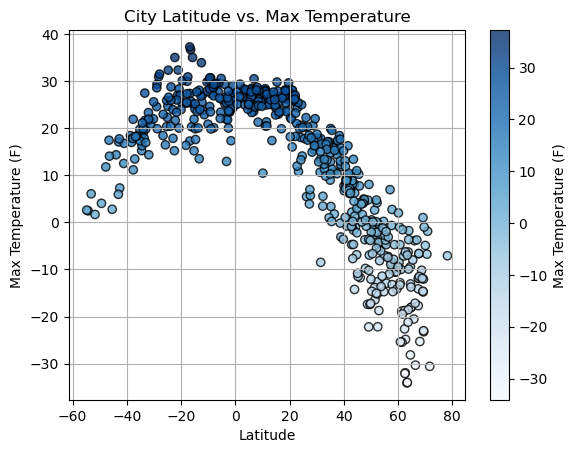

In [108]:
# Build scatter plot for latitude vs. temperature with blue color gradient
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c=city_data_df["Max Temp"], cmap="Blues", edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.colorbar(label="Max Temperature (F)")
plt.grid(True)

# Save the figure 
plt.savefig(r"C:\Users\Qazi Fabia Hoq\OneDrive\Desktop\python-api-challenge\output_data\Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

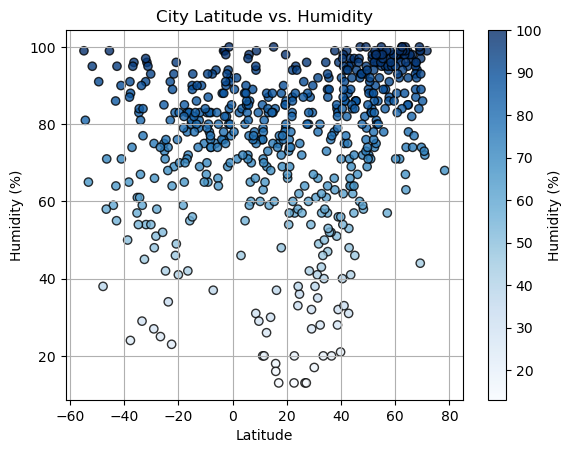

In [109]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c=city_data_df["Humidity"], cmap="Blues", edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.colorbar(label="Humidity (%)")
plt.grid(True)

# Save the figure 
plt.savefig(r"C:\Users\Qazi Fabia Hoq\OneDrive\Desktop\python-api-challenge\output_data\Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

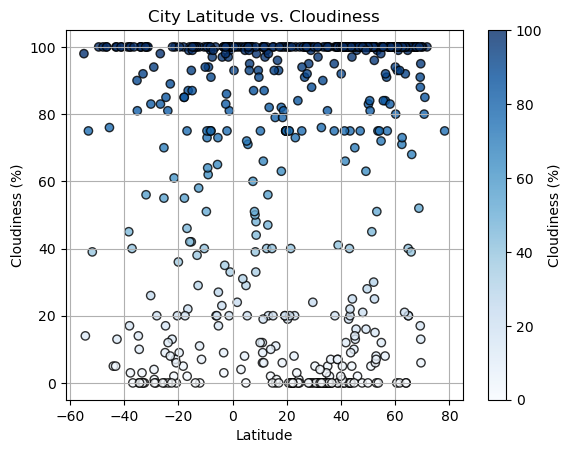

In [110]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c=city_data_df["Cloudiness"], cmap="Blues", edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.colorbar(label="Cloudiness (%)")
plt.grid(True)

# Save the figure 
plt.savefig(r"C:\Users\Qazi Fabia Hoq\OneDrive\Desktop\python-api-challenge\output_data\Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

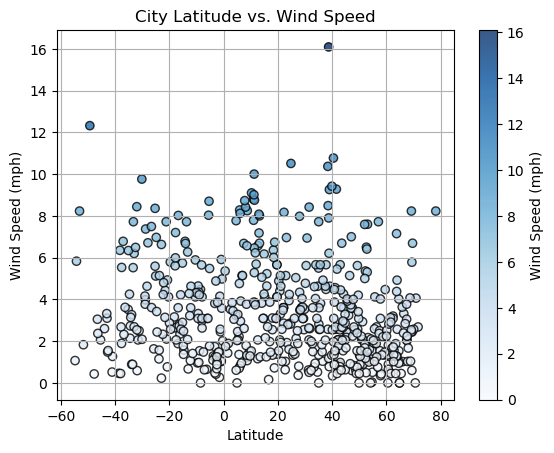

In [111]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c=city_data_df["Wind Speed"], cmap="Blues", edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.colorbar(label="Wind Speed (mph)")
plt.grid(True)

# Save the figure in the specified directory
plt.savefig(r"C:\Users\Qazi Fabia Hoq\OneDrive\Desktop\python-api-challenge\output_data\Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


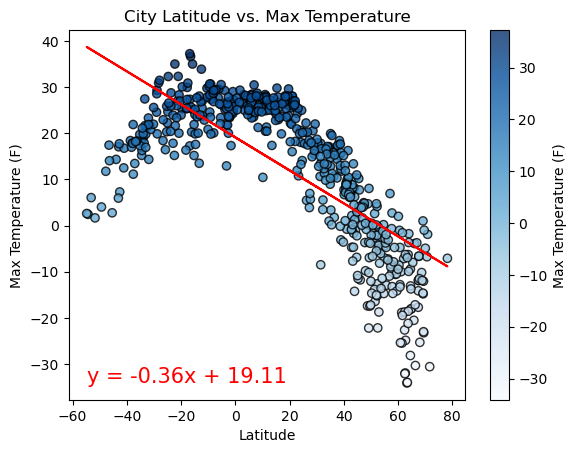

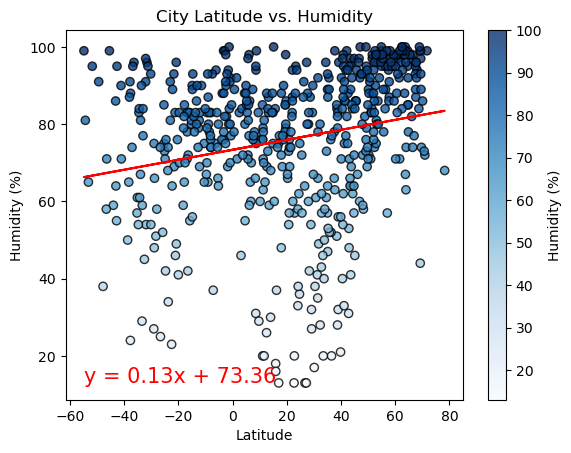

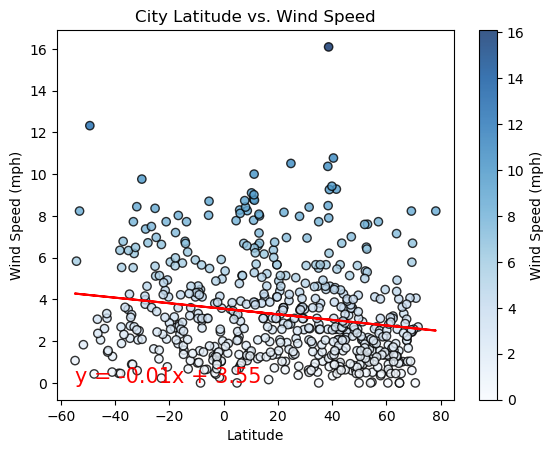

In [112]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values, c=y_values, cmap="Blues", edgecolors="black", marker="o", alpha=0.8)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar(label=ylabel)
    
    # Display the plot
    plt.show()
# Call the function for the latitude vs. temperature relationship
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (F)", "City Latitude vs. Max Temperature")

# Call the function for the latitude vs. humidity relationship
plot_linear_regression(city_data_df["Lat"], city_data_df["Humidity"], "Latitude", "Humidity (%)", "City Latitude vs. Humidity")

# Call the function for the latitude vs. wind speed relationship
plot_linear_regression(city_data_df["Lat"], city_data_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "City Latitude vs. Wind Speed")


In [115]:

# Create a DataFrame with the Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,albany,42.6001,-73.9662,6.79,88,100,0.89,US,1701479324
2,la asuncion,11.0333,-63.8628,26.87,85,6,7.79,VE,1701479575
3,aswan,24.0934,32.9070,18.03,33,0,3.94,EG,1701479575
4,makinsk,52.6292,70.4169,-2.06,96,100,6.50,KZ,1701479575
9,tiksi,71.6872,128.8694,-30.56,99,100,2.68,RU,1701479576


In [116]:
# Create a DataFrame with the Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,26.80,80,100,4.15,GQ,1701479575
5,waitangi,-43.9535,-176.5597,14.34,59,5,2.60,NZ,1701479576
6,atafu village,-8.5421,-172.5159,28.79,78,100,4.47,TK,1701479573
7,grytviken,-54.2811,-36.5092,2.44,81,14,5.83,GS,1701479453
8,adamstown,-25.0660,-130.1015,22.27,73,0,5.12,PN,1701479566


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8075103645072289


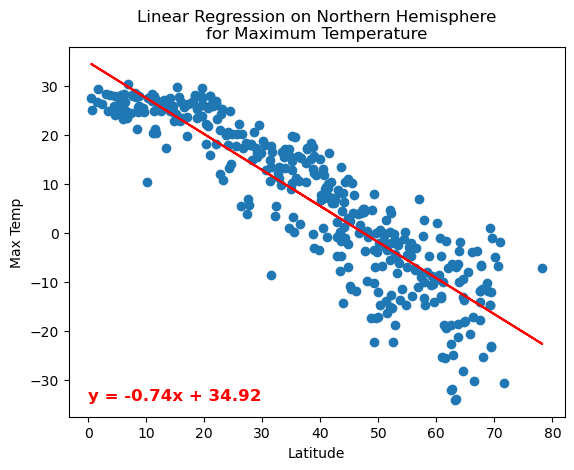

0.8075103645072289

In [117]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Get regression line values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear regression equation on the plot with red color and bold font
    plt.text(*text_coordinates, line_eq, fontsize=12, color="red", weight='bold')
    
    # Label plot
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    # Print r square value
    r_squared = r_value**2
    print(f"The r-squared is: {r_squared}")
    
    # Show plot
    plt.show()

    return r_squared

# Northern Hemisphere DataFrame
northern_df = city_data_df[city_data_df["Lat"] >= 0]

# Define x and y values
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere\nfor Maximum Temperature", "Max Temp", (0, northern_df["Max Temp"].min()))


The r-squared is: 0.40239399875249376


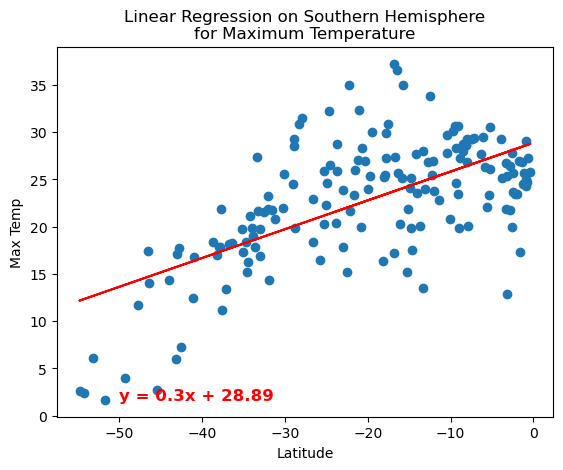

0.40239399875249376

In [119]:
# Southern Hemisphere DataFrame
southern_df = city_data_df[city_data_df["Lat"] < 0]

# Define x and y values
x_values_southern = southern_df["Lat"]
y_values_southern = southern_df["Max Temp"]

plot_linear_regression(x_values_southern, y_values_southern, "Linear Regression on Southern Hemisphere\nfor Maximum Temperature", "Max Temp", (-50, southern_df["Max Temp"].min()))


**Discussion about the linear relationship:** 



Northern Hemisphere: R-squared Value: 0.81 Linear Equation: 
y=0.3x+28.89
The positive slope (0.3) in the Northern Hemisphere indicates an increasing trend. As latitude increases (moving towards the North Pole), the temperature tends to increase. The R-squared value of 0.81 suggests a strong linear relationship, signifying that the model is a good fit for the data. The intercept (28.89) implies that even at the equator (latitude = 0), the predicted temperature is 28.89, reflecting the baseline temperature.

Southern Hemisphere: R-squared Value: 0.40 Linear Equation: 
y=0.4x+20.58
The positive slope (0.4) in the Southern Hemisphere also indicates an increasing trend. As latitude increases (moving towards the South Pole), the temperature tends to increase. However, the R-squared value of 0.40 suggests a weaker linear relationship compared to the Northern Hemisphere. The intercept (20.58) implies that even at the equator (latitude = 0), the predicted temperature is 20.58.

Conclusion:
In the Northern Hemisphere, there is a clear positive correlation between latitude and temperature, indicating that as you move away from the equator (higher latitude), temperatures tend to increase. The strong R-squared value further supports the reliability of this trend.

In the Southern Hemisphere, the positive correlation between latitude and temperature suggests that as you move towards the equator (lower latitude), temperatures tend to increase, but the relationship is not as strong as in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11863436352819628


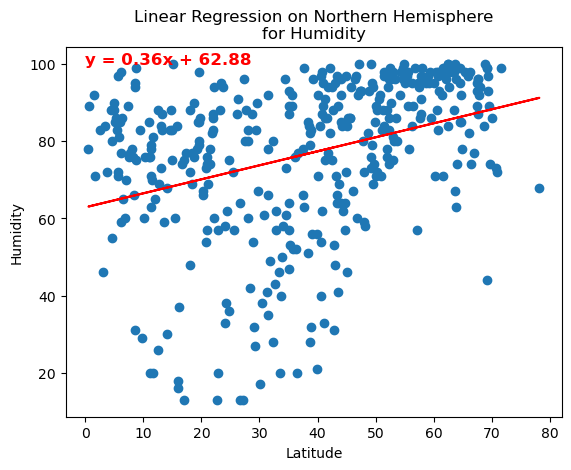

0.11863436352819628

In [126]:
# Northern Hemisphere DataFrame for Humidity
northern_humidity_df = city_data_df[(city_data_df["Lat"] >= 0) & (city_data_df["Humidity"] >= 0)]

# Define x and y values
x_values_humidity = northern_humidity_df["Lat"]
y_values_humidity = northern_humidity_df["Humidity"]


plot_linear_regression(x_values_humidity, y_values_humidity, "Linear Regression on Northern Hemisphere\nfor Humidity", "Humidity", (0, northern_humidity_df["Humidity"].max()))


The r-squared is: 0.04283287787426271


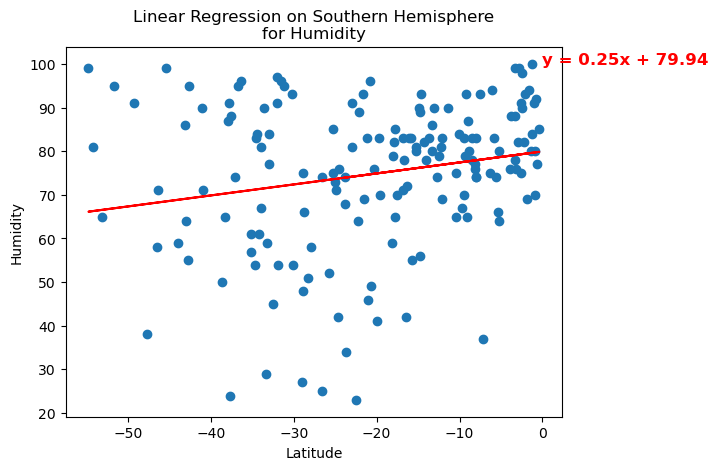

0.04283287787426271

In [127]:
# Southern Hemisphere DataFrame for Humidity
southern_humidity_df = city_data_df[(city_data_df["Lat"] < 0) & (city_data_df["Humidity"] >= 0)]

# Define x and y values
x_values_southern_humidity = southern_humidity_df["Lat"]
y_values_southern_humidity = southern_humidity_df["Humidity"]

plot_linear_regression(x_values_southern_humidity, y_values_southern_humidity, "Linear Regression on Southern Hemisphere\nfor Humidity", "Humidity", (0, southern_humidity_df["Humidity"].max()))


**Discussion about the linear relationship:** 

Northern Hemisphere: R-squared Value: 0.12 Linear Equation: 

y=0.36x+62.88

The positive slope (0.36) in the Northern Hemisphere indicates a weak positive linear relationship. As latitude increases (moving towards the North Pole), there is a slight tendency for humidity to increase. The R-squared value of 0.12 suggests a relatively weak linear relationship, meaning the model may not be the best fit for the data. The intercept (62.88) indicates the baseline humidity at the equator.

Southern Hemisphere: R-squared Value: 0.04 Linear Equation: 

y=0.25x+79.94

The positive slope (0.25) in the Southern Hemisphere also indicates a weak positive linear relationship. As latitude increases (moving towards the South Pole), there is a slight tendency for humidity to increase. However, the R-squared value of 0.04 suggests a weaker linear relationship compared to the Northern Hemisphere. The intercept (79.94) indicates the baseline humidity at the equator in the Southern Hemisphere.

Conclusion:

In both the Northern and Southern Hemispheres, the positive slopes in the linear regression equations suggest a subtle inclination for humidity to increase with higher latitudes. However, it's important to note that the relatively weak R-squared values, both around 0.12 and 0.04, respectively, indicate that latitude alone might not be a robust predictor of humidity levels. It implies that other factors, not considered in this analysis, could play a more substantial role in influencing humidity. The weak correlation suggests that additional variables, such as proximity to bodies of water, elevation, or local weather patterns, may need to be considered for a more accurate prediction of humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.025495737617547327


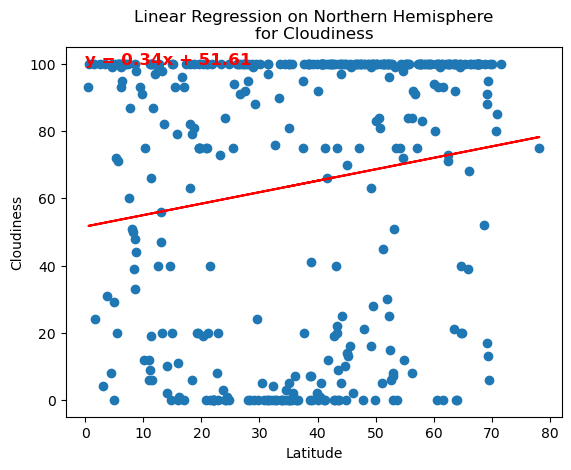

0.025495737617547327

In [122]:
# Northern Hemisphere DataFrame for Cloudiness
northern_cloudiness_df = city_data_df[(city_data_df["Lat"] >= 0) & (city_data_df["Cloudiness"] >= 0)]

# Define x and y values
x_values_northern_cloudiness = northern_cloudiness_df["Lat"]
y_values_northern_cloudiness = northern_cloudiness_df["Cloudiness"]


plot_linear_regression(x_values_northern_cloudiness, y_values_northern_cloudiness, "Linear Regression on Northern Hemisphere\nfor Cloudiness", "Cloudiness", (0, northern_cloudiness_df["Cloudiness"].max()))


The r-squared is: 0.0220516865889486


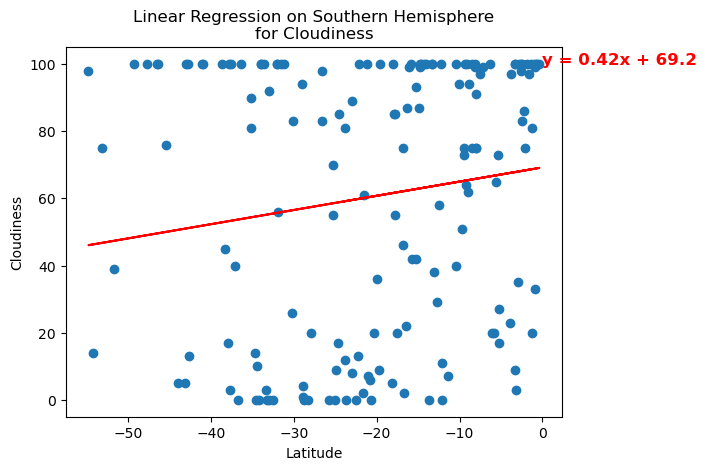

0.0220516865889486

In [123]:
# Southern Hemisphere DataFrame for Cloudiness
southern_cloudiness_df = city_data_df[(city_data_df["Lat"] < 0) & (city_data_df["Cloudiness"] >= 0)]

# Define x and y values
x_values_southern_cloudiness = southern_cloudiness_df["Lat"]
y_values_southern_cloudiness = southern_cloudiness_df["Cloudiness"]


plot_linear_regression(x_values_southern_cloudiness, y_values_southern_cloudiness, "Linear Regression on Southern Hemisphere\nfor Cloudiness", "Cloudiness", (0, southern_cloudiness_df["Cloudiness"].max()))


**Discussion about the linear relationship:** 
Northern Hemisphere:
R-squared Value: 0.03
Linear Equation: 

y=0.34x+51.61

In the Northern Hemisphere, the relatively low R-squared value of 0.03 suggests that there is a weak linear relationship between latitude and cloudiness. The positive slope of 0.34 indicates a slight increase in cloudiness with rising latitude, but the model's fit to the data appears limited. This implies that relying solely on latitude might not be a reliable predictor of cloudiness in the Northern Hemisphere.

Southern Hemisphere:
R-squared Value: 0.02
Linear Equation: 

y=0.42x+69.2

Similarly, in the Southern Hemisphere, the R-squared value of 0.02 indicates a weak linear relationship between latitude and cloudiness. The positive slope of 0.42 suggests a minor increase in cloudiness with higher latitudes. However, the model's capacity to predict cloudiness in the Southern Hemisphere appears constrained. It implies that factors beyond latitude are likely more influential in determining cloudiness levels in this region.

In summary, the modest R-squared values indicate that latitude alone lacks robust predictive power for cloudiness in both the Northern and Southern Hemispheres. The limited strength of the linear relationships suggests that additional factors, such as varied meteorological conditions and regional influences, play a more substantial role in determining cloudiness levels across these geographical zones. The weak correlations underscore the need to consider a broader range of variables for a more accurate understanding and prediction of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.06483312576835412


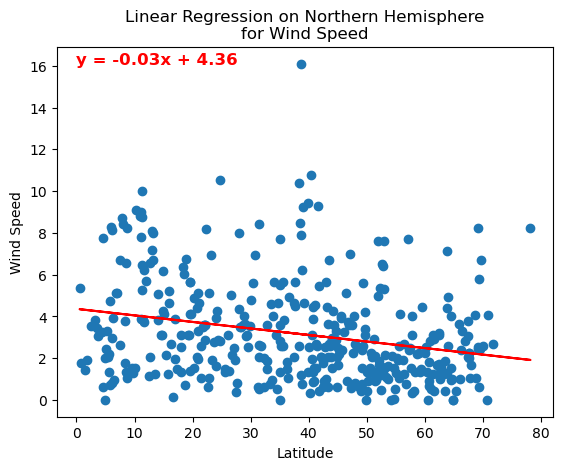

0.06483312576835412

In [128]:
# Northern Hemisphere DataFrame for Wind Speed
northern_wind_speed_df = city_data_df[(city_data_df["Lat"] >= 0) & (city_data_df["Wind Speed"] >= 0)]

# Define x and y values
x_values_northern_wind_speed = northern_wind_speed_df["Lat"]
y_values_northern_wind_speed = northern_wind_speed_df["Wind Speed"]

plot_linear_regression(x_values_northern_wind_speed, y_values_northern_wind_speed, "Linear Regression on Northern Hemisphere\nfor Wind Speed", "Wind Speed", (0, northern_wind_speed_df["Wind Speed"].max()))


The r-squared is: 0.02210735281956821


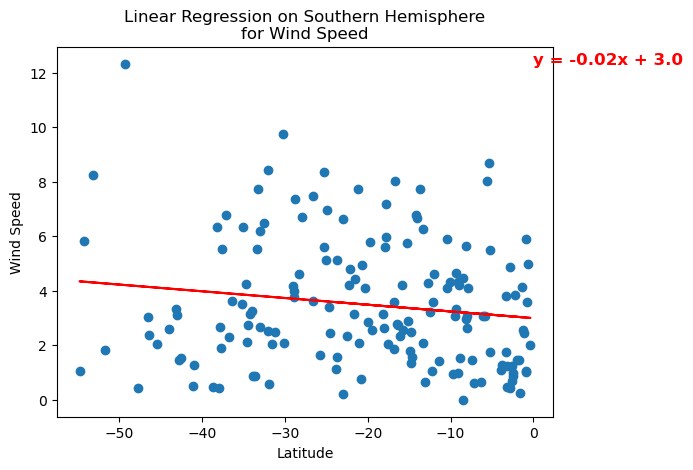

0.02210735281956821

In [129]:
# Southern Hemisphere DataFrame for Wind Speed
southern_wind_speed_df = city_data_df[(city_data_df["Lat"] < 0) & (city_data_df["Wind Speed"] >= 0)]

# Define x and y values
x_values_southern_wind_speed = southern_wind_speed_df["Lat"]
y_values_southern_wind_speed = southern_wind_speed_df["Wind Speed"]


plot_linear_regression(x_values_southern_wind_speed, y_values_southern_wind_speed, "Linear Regression on Southern Hemisphere\nfor Wind Speed", "Wind Speed", (0, southern_wind_speed_df["Wind Speed"].max()))


**Discussion about the linear relationship:** 
Northern Hemisphere:
R-squared Value: 0.06
Linear Equation: 

y=−0.03x+4.36

In the Northern Hemisphere, the relatively low R-squared value of 0.06 suggests a weak linear relationship between latitude and wind speed. The negative slope (-0.03) indicates a subtle decrease in wind speed as latitude increases, but the model's predictive capability is limited. It implies that latitude alone may not be a robust predictor of wind speed in the Northern Hemisphere.

Southern Hemisphere:
R-squared Value: 0.02
Linear Equation: 

y=−0.02x+3.0

Similarly, in the Southern Hemisphere, the R-squared value of 0.02 indicates a weak linear relationship between latitude and wind speed. The negative slope (-0.02) suggests a subtle decrease in wind speed as latitude increases, but the model's predictive power is limited. Other meteorological and geographical factors likely play a more substantial role in influencing wind speed levels in the Southern Hemisphere.

In both hemispheres, the modest R-squared values indicate that relying solely on latitude may not be highly effective in predicting wind speed. Various meteorological factors and regional distinctions are probable contributors to the variations in wind speed within these regions. The weak correlations emphasize the need to consider a broader set of variables for a more accurate understanding and prediction of wind speed.










